In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)

1.3.4


In [2]:
# Nếu muốn xử lý cả giá trị vô cực (inf) như dữ liệu khuyết
pd.options.mode.use_inf_as_na = True

# Thay thế với 'where' và 'mask'

In [3]:
a = np.random.randint(0, 10, size=(3,4))
df1 = pd.DataFrame(data=a, columns=list('ABCD'), dtype='uint8')
df1

,A,B,C,D
0,0,3,9,0
1,7,8,0,3
2,9,8,7,0


In [4]:
# Thay thế nếu điều kiện KHÔNG THỎA
df1.where(df1 > 5, 5, inplace=False)

,A,B,C,D
0,5,5,9,5
1,7,8,5,5
2,9,8,7,5


In [5]:
# Thay thế nếu điều kiện THỎA
df1.mask(df1 > 5, 5, inplace=False)

,A,B,C,D
0,0,3,5,0
1,5,5,0,3
2,5,5,5,0


# 0. Load dữ liệu và kiểm tra sơ bộ thông tin

In [6]:
fdata = pd.read_csv('flight-data/nycflights.csv', index_col=0)
fdata.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [7]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


In [26]:
fdata.sample(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
225921,2013,6,5,717.0,-8.0,841.0,-24.0,AA,N582AA,305,LGA,ORD,110.0,733,7.0,17.0
147629,2013,3,13,929.0,-1.0,1150.0,-10.0,9E,N8938A,4065,LGA,SDF,113.0,659,9.0,29.0
156241,2013,3,22,1132.0,-3.0,1443.0,-6.0,DL,N979DL,2044,LGA,MIA,151.0,1096,11.0,32.0
270799,2013,7,22,1754.0,-6.0,NaN,NaN,US,N967UW,2138,LGA,BOS,NaN,184,17.0,54.0
174069,2013,4,10,1243.0,-2.0,1540.0,-5.0,WN,N642WN,1637,EWR,HOU,199.0,1411,12.0,43.0


In [8]:
fdata['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [9]:
fdata['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [10]:
fdata['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [11]:
fdata['tailnum'].unique().size

4044

# 1. Tìm và loại bỏ dữ liệu khuyết

**Kiểm tra dữ liệu NaN**

In [31]:
fdata.isna()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,True
336773,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,True
336774,False,False,False,True,True,True,True,False,False,False,False,False,True,False,True,True
336775,False,False,False,True,True,True,True,False,False,False,False,False,True,False,True,True


In [45]:
fdata.isnull()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,True
336773,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,True
336774,False,False,False,True,True,True,True,False,False,False,False,False,True,False,True,True
336775,False,False,False,True,True,True,True,False,False,False,False,False,True,False,True,True


In [12]:
fdata.isnull().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
dtype: int64

**Kiểm tra dữ liệu không phải là NaN**

In [13]:
fdata.notna()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,True,True,True,False,False,False,False,True,False,True,True,True,False,True,False,False
336773,True,True,True,False,False,False,False,True,False,True,True,True,False,True,False,False
336774,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False
336775,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False


**Lọc ra tất cả các dòng có xuất hiện NaN**

In [38]:
# Dùng hàm isna()
fdata[fdata.isna().any(axis=1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
472,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147,15.0,25.0
478,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872,15.0,28.0
616,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147,17.0,40.0
644,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
726,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391,19.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [46]:
# Dùng hàm isnull()
fdata[fdata.isnull().any(axis=1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
472,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147,15.0,25.0
478,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872,15.0,28.0
616,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147,17.0,40.0
644,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
726,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391,19.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


**Loại bỏ tất cả các dòng có xuất hiện bất cứ NaN nào**

In [51]:
# Loại bỏ tất cả các dòng có NaN
# Lưu ý: nếu chọn axis=1 sẽ bỏ các cột có NaN
fdata.dropna(inplace=True, axis=0, how="any")

In [52]:
# Kiểm tra lại
fdata.isna().any()

year         False
month        False
day          False
dep_time     False
dep_delay    False
arr_time     False
arr_delay    False
carrier      False
tailnum      False
flight       False
origin       False
dest         False
air_time     False
distance     False
hour         False
minute       False
dtype: bool

In [54]:
# Kiểm tra lại index: có 327346 giá trị, nhưng lớn nhất lại là 336770
fdata.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            336761, 336762, 336763, 336764, 336765, 336766, 336767, 336768,
            336769, 336770],
           dtype='int64', length=327346)

In [57]:
fdata.reset_index(inplace=True, drop=True)
fdata.index

RangeIndex(start=0, stop=327346, step=1)

# 2. Điền vào dữ liệu thiếu

**Chỉ load một số cột**

In [16]:
fdata = pd.read_csv('flight-data/nycflights.csv', index_col=0)
fdata.drop(['dep_time','air_time', 'tailnum', 'hour', 'minute'], inplace=True, axis=1)
fdata.head()

,year,month,day,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,distance
1,2013,1,1,2.0,830.0,11.0,UA,1545,EWR,IAH,1400
2,2013,1,1,4.0,850.0,20.0,UA,1714,LGA,IAH,1416
3,2013,1,1,2.0,923.0,33.0,AA,1141,JFK,MIA,1089
4,2013,1,1,-1.0,1004.0,-18.0,B6,725,JFK,BQN,1576
5,2013,1,1,-6.0,812.0,-25.0,DL,461,LGA,ATL,762


In [17]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_delay  328521 non-null  float64
 4   arr_time   328063 non-null  float64
 5   arr_delay  327346 non-null  float64
 6   carrier    336776 non-null  object 
 7   flight     336776 non-null  int64  
 8   origin     336776 non-null  object 
 9   dest       336776 non-null  object 
 10  distance   336776 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 30.8+ MB


**Điền vào dữ liệu thiếu với hàm `df.fillna()`**

In [23]:
fdata['dep_delay'].fillna(fdata['dep_delay'].mean(), inplace=True)
fdata['arr_delay'].fillna(fdata['arr_delay'].mean(), inplace=True)

In [24]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_delay  336776 non-null  float64
 4   arr_time   336776 non-null  float64
 5   arr_delay  336776 non-null  float64
 6   carrier    336776 non-null  object 
 7   flight     336776 non-null  int64  
 8   origin     336776 non-null  object 
 9   dest       336776 non-null  object 
 10  distance   336776 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 30.8+ MB


## 2.2. Sử dụng hàm interpolate

In [25]:
fdata['arr_time'].interpolate(method='values', inplace=True)

In [26]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_delay  336776 non-null  float64
 4   arr_time   336776 non-null  float64
 5   arr_delay  336776 non-null  float64
 6   carrier    336776 non-null  object 
 7   flight     336776 non-null  int64  
 8   origin     336776 non-null  object 
 9   dest       336776 non-null  object 
 10  distance   336776 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 30.8+ MB


**Interpolate với dữ liệu thời gian**

In [10]:
dates = pd.date_range("20210901", periods=10)
s = pd.Series([18, 12, 15, np.nan, 13, 10, 11, np.nan, 19, 17], index=dates)
s

2021-09-01    18.0
2021-09-02    12.0
2021-09-03    15.0
2021-09-04     NaN
2021-09-05    13.0
2021-09-06    10.0
2021-09-07    11.0
2021-09-08     NaN
2021-09-09    19.0
2021-09-10    17.0
Freq: D, dtype: float64

In [11]:
s.interpolate(method='values')

2021-09-01    18.0
2021-09-02    12.0
2021-09-03    15.0
2021-09-04    14.0
2021-09-05    13.0
2021-09-06    10.0
2021-09-07    11.0
2021-09-08    15.0
2021-09-09    19.0
2021-09-10    17.0
Freq: D, dtype: float64

In [12]:
s.interpolate(method='time')

2021-09-01    18.0
2021-09-02    12.0
2021-09-03    15.0
2021-09-04    14.0
2021-09-05    13.0
2021-09-06    10.0
2021-09-07    11.0
2021-09-08    15.0
2021-09-09    19.0
2021-09-10    17.0
Freq: D, dtype: float64

# 3. Tìm và loại bỏ outliers

Trong một phân bố đều hoặc chuẩn, một giá trị thuờng được coi là outlier nếu nó cách xa điểm trung bình ít nhất 3 lần Standard Deviation

In [186]:
np.random.seed(2)
a = np.random.randint(35, 40, size=(20,2))
df1 = pd.DataFrame(data=a, index=range(1,21), columns=list('AB'), dtype='uint8')
df1.iloc[1,0] = 1
df1.iloc[3,1] = 2
df1

,A,B
1,35,35
2,1,37
3,38,35
4,37,2
5,38,37
6,39,39
7,39,38
8,39,37
9,38,38
10,37,36


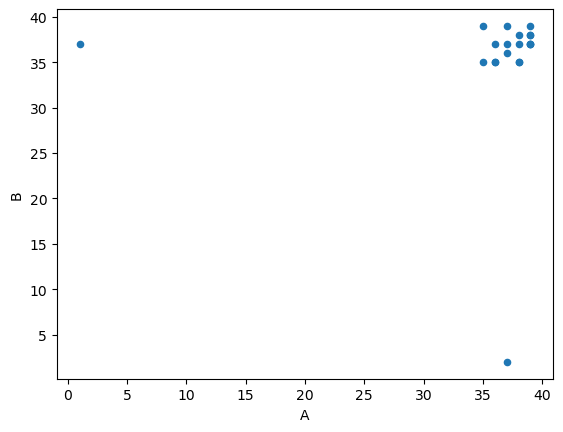

In [187]:
df1.plot.scatter(x='A', y='B')
plt.show()

In [188]:
from scipy import stats
z_scores = stats.zscore(df1)
z_scores

array([[-0.081, -0.019],
       [-4.3  ,  0.24 ],
       [ 0.292, -0.019],
       [ 0.168, -4.293],
       [ 0.292,  0.24 ],
       [ 0.416,  0.499],
       [ 0.416,  0.369],
       [ 0.416,  0.24 ],
       [ 0.292,  0.369],
       [ 0.168,  0.11 ],
       [ 0.168,  0.499],
       [ 0.292, -0.019],
       [ 0.416,  0.369],
       [ 0.043,  0.24 ],
       [-0.081,  0.499],
       [ 0.416,  0.24 ],
       [ 0.416,  0.24 ],
       [ 0.043, -0.019],
       [ 0.168,  0.24 ],
       [ 0.043, -0.019]])

In [190]:
# Các dòng cần được loại bỏ
df1[(np.abs(z_scores) > 3).any(axis=1)]

,A,B
2,1,37
4,37,2


In [191]:
# Các dòng còn lại
df1[(np.abs(z_scores) < 3).all(axis=1)]

,A,B
1,35,35
3,38,35
5,38,37
6,39,39
7,39,38
8,39,37
9,38,38
10,37,36
11,37,39
12,38,35
